In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the dataset from a specific location as a DataFrame
dataset = pd.read_csv(r'C:\Users\abact\BC-Project\data\clean_data.csv')
dataset

Federal_Reserve_Mins  \
0    A meeting of the Federal Open Market Committee...   
1    A meeting of the Federal Open Market Committee...   
2    A meeting of the Federal Open Market Committee...   
3    A meeting of the Federal Open Market Committee...   
4    A meeting of the Federal Open Market Committee...   
..                                                 ...   
237  The Federal Reserve, the central bank of the U...   
238  The Federal Reserve, the central bank of the U...   
239  The Federal Reserve, the central bank of the U...   
240  The Federal Reserve, the central bank of the U...   
241  The Federal Reserve, the central bank of the U...   

                                     Preprocessed Text        Date  \
0    meeting federal open market committee held off...  1993-02-03   
1    meeting federal open market committee held off...  1993-03-23   
2    meeting federal open market committee held off...  1993-05-18   
3    meeting federal open market committee held off...  1993-07-07   
4    meeting federal open market committee held off...  1993-08-17   
..                                                 ...         ...   
237  federal reserve central bank united state prov...  2022-11-02   
238  federal reserve central bank united state prov...  2022-12-14   
239  federal reserve central bank united state prov...  2023-02-01   
240  federal reserve central bank united state prov...  2023-03-22   
241  federal reserve central bank united state prov...  2023-05-03   

     Difference  Increase  Decrease  Level      CPI  Unemployment Rate  \
0          0.00      0.00       0.0   3.75  142.800                7.3   
1          0.00      0.00       0.0   3.75  143.300                7.0   
2          0.00      0.00       0.0   3.75  144.200                7.1   
3         -0.50      0.00       0.5   3.25  144.500                6.9   
4          0.00      0.00       0.0   3.25  144.800                6.8   
..          ...       ...       ...    ...      ...                ...   
237        0.75      0.75       0.0   4.00  297.987                3.7   
238        0.50      0.50       0.0   4.50  298.990                3.5   
239        0.25      0.25       0.0   4.75  300.536                3.4   
240        0.25      0.25       0.0   5.00  301.808                3.5   
241        0.25      0.25       0.0   5.25  302.918                3.4   

     Consumer Sentiment  ...  Short-Term Treasury Bond Rate  \
0                  89.3  ...                           2.90   
1                  85.9  ...                           2.95   
2                  80.3  ...                           2.93   
3                  77.0  ...                           2.95   
4                  77.3  ...                           3.01   
..                  ...  ...                            ...   
237                59.9  ...                           3.99   
238                59.7  ...                           4.19   
239                64.9  ...                           4.57   
240                62.0  ...                           4.36   
241                63.5  ...                           4.95   

     Long-Term Treasury Bond Rate  Bank Reserves  Housing Sales  \
0                            6.60          8.761          596.0   
1                            5.98          5.563          602.0   
2                            6.04          5.646          626.0   
3                            5.81         16.256          655.0   
4                            5.68          5.661          645.0   
..                            ...            ...            ...   
237                          3.98        634.548          577.0   
238                          3.62        432.335          636.0   
239                          3.53        491.848          649.0   
240                          3.66        232.866          656.0   
241                          3.46        291.702          683.0   

     Nonfarm Payroll       LEI       CEI     

### Assigning Positive and Negative scores to FOMC minutes, as well as counting frequency and observing trends over time of Positive and Negative Scores-

In [3]:
# Load Loughran and McDonald Sentiment Word List into a dictionary
sentiment_word_list = {}

with open(r"C:\Users\abact\BC-Project\data\external\Loughran-McDonald_MasterDictionary_1993-2021.csv", 'r') as file:
    # Skip the header line
    next(file)

    for line in file:
        # Split the line by comma
        values = line.strip().split(',')

        # Extract the necessary values
        word = values[0].lower()
        positive = float(values[8])  # Positive column index is 8
        negative = float(values[9])  # Negative column index is 9

        # Assign the word as positive or negative based on the positive or negative values
        if positive > 0:
            sentiment_word_list[word] = 1
        elif negative > 0:
            sentiment_word_list[word] = -1

# Calculate net sentiment score for each datapoint
net_sentiment_scores = []
positive_word_frequencies = []
negative_word_frequencies = []

for datapoint in dataset['Preprocessed Text']:
    words = datapoint.lower().split()  # Tokenize the text into words
    net_sentiment = sum(sentiment_word_list.get(word, 0) for word in words)
    net_sentiment_scores.append(net_sentiment)
    
    positive_words = sum(1 for word in words if sentiment_word_list.get(word, 0) == 1)
    positive_word_frequencies.append(positive_words)
    
    negative_words = sum(1 for word in words if sentiment_word_list.get(word, 0) == -1)
    negative_word_frequencies.append(negative_words)

# Add 'Net Sentiment Score', 'Positive Frequency', and 'Negative Frequency' as new columns in the dataset
dataset['Net Sentiment Score'] = net_sentiment_scores
dataset['Positive Frequency'] = positive_word_frequencies
dataset['Negative Frequency'] = negative_word_frequencies

# Create 'Sentiment Label' column based on the net sentiment score
dataset['Sentiment Label'] = [1 if score > 0 else 0 for score in net_sentiment_scores]

###Check that  positive values properly received a value of 1

In [4]:
positive_frequency_words = []
for index, row in dataset.iterrows():
    words = row['Preprocessed Text'].lower().split()  # Tokenize the text into words
    positive_words = [word for word in words if sentiment_word_list.get(word, 0) == 1]
    positive_frequency_words.append(positive_words)

dataset['Positive Words'] = positive_frequency_words

In [5]:
negative_frequency_words = []
for index, row in dataset.iterrows():
    words = row['Preprocessed Text'].lower().split()  # Tokenize the text into words
    negative_words = [word for word in words if sentiment_word_list.get(word, 0) == -1]
    negative_frequency_words.append(negative_words)

dataset['Negative Words'] = negative_frequency_words

In [6]:
negative_frequency_words

[['might',
  'may',
  'may',
  'may',
  'may',
  'may',
  'may',
  'may',
  'may',
  'probable',
  'may',
  'might',
  'might',
  'appeared',
  'suggested',
  'nearly',
  'almost',
  'nearly',
  'apparently',
  'suggested',
  'appeared',
  'somewhat',
  'presumption',
  'unusually',
  'somewhat',
  'volatile',
  'anticipation',
  'somewhat',
  'somewhat',
  'possibly',
  'somewhat',
  'might',
  'perhaps',
  'might',
  'somewhat',
  'appeared',
  'suggested',
  'anticipated',
  'uncertainty',
  'assumption',
  'appeared',
  'uncertainty',
  'could',
  'unknown',
  'uncertainty',
  'believed',
  'anticipated',
  'predict',
  'unusual',
  'uncertain',
  'might',
  'could',
  'somewhat',
  'depend',
  'might',
  'anticipated',
  'suggested',
  'risk',
  'apparent',
  'might',
  'might',
  'could',
  'anticipated',
  'might',
  'suggest',
  'believed',
  'anticipated',
  'apparently',
  'anticipated',
  'anticipated',
  'suggested',
  'possibility',
  'might',
  'somewhat',
  'appear',
  '

In [7]:
dataset

Federal_Reserve_Mins  \
0    A meeting of the Federal Open Market Committee...   
1    A meeting of the Federal Open Market Committee...   
2    A meeting of the Federal Open Market Committee...   
3    A meeting of the Federal Open Market Committee...   
4    A meeting of the Federal Open Market Committee...   
..                                                 ...   
237  The Federal Reserve, the central bank of the U...   
238  The Federal Reserve, the central bank of the U...   
239  The Federal Reserve, the central bank of the U...   
240  The Federal Reserve, the central bank of the U...   
241  The Federal Reserve, the central bank of the U...   

                                     Preprocessed Text        Date  \
0    meeting federal open market committee held off...  1993-02-03   
1    meeting federal open market committee held off...  1993-03-23   
2    meeting federal open market committee held off...  1993-05-18   
3    meeting federal open market committee held off...  1993-07-07   
4    meeting federal open market committee held off...  1993-08-17   
..                                                 ...         ...   
237  federal reserve central bank united state prov...  2022-11-02   
238  federal reserve central bank united state prov...  2022-12-14   
239  federal reserve central bank united state prov...  2023-02-01   
240  federal reserve central bank united state prov...  2023-03-22   
241  federal reserve central bank united state prov...  2023-05-03   

     Difference  Increase  Decrease  Level      CPI  Unemployment Rate  \
0          0.00      0.00       0.0   3.75  142.800                7.3   
1          0.00      0.00       0.0   3.75  143.300                7.0   
2          0.00      0.00       0.0   3.75  144.200                7.1   
3         -0.50      0.00       0.5   3.25  144.500                6.9   
4          0.00      0.00       0.0   3.25  144.800                6.8   
..          ...       ...       ...    ...      ...                ...   
237        0.75      0.75       0.0   4.00  297.987                3.7   
238        0.50      0.50       0.0   4.50  298.990                3.5   
239        0.25      0.25       0.0   4.75  300.536                3.4   
240        0.25      0.25       0.0   5.00  301.808                3.5   
241        0.25      0.25       0.0   5.25  302.918                3.4   

     Consumer Sentiment  ...       CEI       LAG  Treasury Deposits  \
0                  89.3  ...  0.292879  1.029760              7.400   
1                  85.9  ... -0.425421 -1.435061              5.449   
2                  80.3  ... -0.006311  0.001156              5.952   
3                  77.0  ... -0.024516 -0.066366              6.289   
4                  77.3  ... -0.093464 -0.301481              5.810   
..                  ...  ...       ...       ...                ...   
237                59.9  ... -0.530863 -1.822018            620.997   
238                59.7  ... -1.047802 -3.608114            418.890   
239                64.9  ... -0.060130 -0.226932            406.708   
240                62.0  ... -0.861014 -2.973276            278.125   
241                63.5  ... -0.457996 -1.588814            184.064   

     Average Hourly Earnings  Net Sentiment Score  Positive Frequency  \
0                      10.93                  -36                 106   
1                      10.99                    2                  89   
2                      11.01                  -33                  62   
3                      11.05                  -65                  88   
4                      11.07                   -7                  61   
..                       ...                  ...                 ...   
237                    27.96                  -34                  69   
238                    28.21                  -21                  77   
239                    28.29                  -26                  80   
240                    2

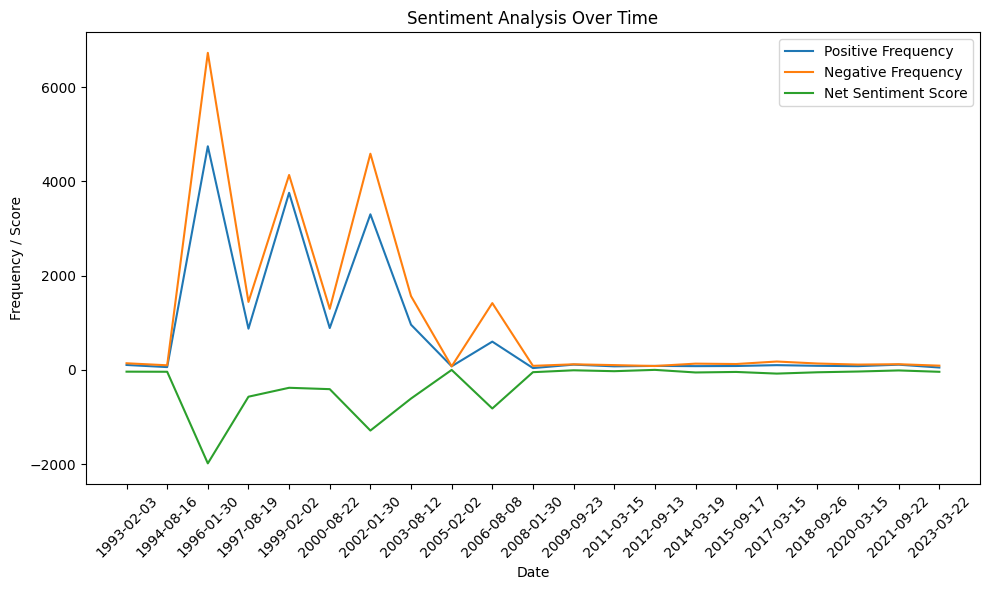

In [8]:
# Filter dataset to include every 12th date
filtered_dataset = dataset[::12]

# Extract the required data
dates = filtered_dataset['Date']
positive_frequency = filtered_dataset['Positive Frequency']
negative_frequency = filtered_dataset['Negative Frequency']
net_sentiment_score = filtered_dataset['Net Sentiment Score']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dates, positive_frequency, label='Positive Frequency')
plt.plot(dates, negative_frequency, label='Negative Frequency')
plt.plot(dates, net_sentiment_score, label='Net Sentiment Score')

plt.xlabel('Date')
plt.ylabel('Frequency / Score')
plt.title('Sentiment Analysis Over Time')
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

In [9]:
last_20_positive = dataset['Positive Frequency'][-20:]
last_20_negative= dataset['Negative Frequency'][-20:]
last_20_net = dataset['Net Sentiment Score'][-20:]

combined_df = pd.concat([last_20_positive, last_20_negative, last_20_net], axis=1)
combined_df

Positive Frequency  Negative Frequency  Net Sentiment Score
222                 112                 107                    5
223                 155                 131                   24
224                 126                 106                   20
225                 127                 140                  -13
226                 118                 123                   -5
227                 142                 171                  -29
228                 112                 122                  -10
229                 112                 102                   10
230                 116                 143                  -27
231                 133                 160                  -27
232                  67                 138                  -71
233                  70                 114                  -44
234                  69                 132                  -63
235                  85                 139                  -54
236                  71                  98                  -27
237                  69                 103                  -34
238                  77                  98                  -21
239                  80                 106                  -26
240                  52                  91                  -39
241                  67                 143                  -76

In [10]:
# Create dictionaries to store positive and negative word frequencies per row
positive_word_frequencies = {}
negative_word_frequencies = {}

# Iterate over each row in the preprocessed text
for index, datapoint in dataset['Preprocessed Text'].iteritems():
    words = datapoint.lower().split()  # Tokenize the text into words

    # Iterate over each word and check its sentiment
    for word in words:
        if word in sentiment_word_list:
            sentiment = sentiment_word_list[word]
            if sentiment == 1:
                positive_word_frequencies[word] = positive_word_frequencies.get(word, 0) + 1
            elif sentiment == -1:
                negative_word_frequencies[word] = negative_word_frequencies.get(word, 0) + 1

# Get the 10 most frequent positive words
top_positive_words = sorted(positive_word_frequencies, key=positive_word_frequencies.get, reverse=True)[:10]

# Get the 10 most frequent negative words
top_negative_words = sorted(negative_word_frequencies, key=negative_word_frequencies.get, reverse=True)[:10]

print("Top 10 Positive Words:")
for word in top_positive_words:
    print(f"{word}: {positive_word_frequencies[word]}")

print("\nTop 10 Negative Words:")
for word in top_negative_words:
    print(f"{word}: {negative_word_frequencies[word]}")


C:\Users\abact\AppData\Local\Temp\ipykernel_19876\1660354915.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, datapoint in dataset['Preprocessed Text'].iteritems():


Top 10 Positive Words:
stability: 10650
good: 9895
gain: 9610
strong: 8205
strength: 6656
favorable: 5775
despite: 5012
positive: 3572
strengthening: 3321
improvement: 3030

Top 10 Negative Words:
risk: 19292
somewhat: 15186
could: 14385
might: 12838
anticipated: 9143
suggested: 8959
appeared: 8184
uncertainty: 8019
may: 8010
possible: 4123


### We also want to understand the relative number of positive and negative words in each speech. Just knowing the number of positive and negative words alone doesn't tell us much about the scope of the net sentimentality.

In [11]:
# Create an empty list to store the word counts
word_count = []

# Iterate over each row in the preprocessed text
for datapoint in dataset['Preprocessed Text']:
    words = datapoint.lower().split()  # Tokenize the text into words
    num_words = len(words)  # Calculate the number of words in the row
    word_count.append(num_words)  # Add the word count to the list

# Print the word counts
print("Word Count:")
for count in word_count:
    print(count)

Word Count:
6085
3520
3059
4268
2859
3582
3045
3502
6108
3871
2994
4022
2971
3108
3368
3443
4827
4603
3060
4141
2692
2950
3022
2988
231389
15282
16975
19898
20140
19661
20171
19941
56266
51364
52203
71523
49348
42634
55571
25738
246599
48807
62890
78222
57291
65547
91559
55537
165012
49878
80204
49643
86735
46981
49838
57214
171965
55666
43131
49729
44929
38460
46098
59217
198938
56315
57866
61389
56000
42043
48214
50672
151380
51826
40666
94274
85917
65178
63792
108403
138617
35232
3987
60789
42013
43637
40006
48106
15463
34611
3135
2967
2628
35614
2330
2536
4384
2614
2732
2299
2727
2141
2371
2320
2848
4102
2794
3014
35983
2703
2399
4649
2399
2616
2842
2624
2829
3543
7057
48062
3793
6996
3252
8166
2869
4968
4736
18119
4015
3906
5095
4318
4457
8600
4879
6507
4025
4247
4849
4034
3627
4338
4042
6191
4080
4664
4010
4240
4979
4619
4576
6732
3998
4539
4914
4421
4181
4821
4641
4633
6671
4439
5180
4624
4459
4835
5414
7247
5145
4871
3746
5107
5335
5140
4183
7768
5288
4918
5201
5447
4806
5251
4

In [12]:
# Calculate the proportions of positive words per minute for each row
positive_words_per_minute = dataset['Positive Frequency'] / word_count

# Calculate the proportions of negative words per minute for each row
negative_words_per_minute = dataset['Negative Frequency'] / word_count

# Add the calculated columns to the dataset
dataset['Proportion Positive Words'] = positive_words_per_minute
dataset['Proportion Negative Words'] = negative_words_per_minute
dataset['Word Count'] = word_count

In [13]:
# Select the last 7 columns
last_7_columns = dataset.iloc[:, -7:]

# Calculate summary statistics
summary = last_7_columns.describe()

# Display the summary statistics
print(summary)

       Negative Frequency  Sentiment Label  Proportion Positive Words  \
count          242.000000       242.000000                 242.000000   
mean           651.747934         0.061983                   0.018806   
std           1075.998507         0.241625                   0.004286   
min             36.000000         0.000000                   0.008655   
25%            103.000000         0.000000                   0.015698   
50%            139.000000         0.000000                   0.018717   
75%            782.250000         0.000000                   0.021628   
max           6779.000000         1.000000                   0.030320   

       Proportion Negative Words     Word Count  
count                 242.000000     242.000000  
mean                    0.027527   21595.041322  
std                     0.005559   36629.348107  
min                     0.015183    2141.000000  
25%                     0.023612    4252.250000  
50%                     0.027384    5418.0

### While Net Sentiment Score will suffice for model building, it is hard to interpret. As such, we will standardize the Net Sentiment Score around 0 and evaluate the magnitude of positivity and negativity around a 0 mean with standard deviations used to calculate magnitude above or below mean

In [14]:
# Create an instance of the MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Reshape the Net Sentiment Score column
net_sentiment_scores = dataset["Net Sentiment Score"].values.reshape(-1, 1)

# Scale the scores to the range of -1 to 1
scaled_scores = scaler.fit_transform(net_sentiment_scores)

# Add a new column for the scaled scores
dataset["Standardized Sentiment Score"] = scaled_scores

In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(dataset["Standardized Sentiment Score"])

0      0.917201
1      0.954657
2      0.920158
3      0.888615
4      0.945786
5      0.940858
6      0.940858
7      0.955643
8      0.941843
9      0.911286
10     0.939872
11     0.892558
12     0.915229
13     0.915229
14     0.929029
15     0.931986
16     0.915229
17     0.913258
18     0.934943
19     0.879744
20     0.947758
21     0.957615
22     0.940858
23     0.952686
24    -1.000000
25     0.826516
26     0.817644
27     0.648103
28     0.431247
29     0.601774
30     0.773287
31     0.847215
32     0.579103
33     0.011336
34     0.202563
35     0.066535
36     0.393790
37     0.383933
38     0.054707
39     0.752587
40    -0.571217
41     0.619517
42     0.235091
43    -0.469690
44     0.190734
45    -0.202563
46    -0.493346
47     0.651060
48     0.580089
49     0.479547
50    -0.330705
51     0.748645
52     0.501232
53     0.502218
54     0.367176
55     0.225234
56     0.138492
57     0.954657
58     0.762445
59     0.020207
60     0.551503
61     0.484475
62     0

In [16]:
# Calculate summary statistics
summary = dataset.describe()

summary

Difference    Increase    Decrease       Level         CPI  \
count  242.000000  242.000000  242.000000  242.000000  242.000000   
mean     0.020661    0.067149    0.046488    2.521694  208.593198   
std      0.224502    0.152385    0.144606    2.154387   40.844843   
min     -1.000000    0.000000    0.000000    0.250000  142.800000   
25%      0.000000    0.000000    0.000000    0.250000  172.925000   
50%      0.000000    0.000000    0.000000    1.750000  211.689000   
75%      0.000000    0.000000    0.000000    4.750000  237.714000   
max      0.750000    0.750000    1.000000    6.500000  302.918000   

       Unemployment Rate  Consumer Sentiment   Retail Sales  \
count         242.000000          242.000000     242.000000   
mean            5.715289           86.820661  329021.123967   
std             1.795052           13.211669  109754.886537   
min             3.400000           50.000000  154752.000000   
25%             4.400000           77.525000  249830.000000   
50%             5.350000           89.300000  321331.500000   
75%             6.300000           95.975000  394678.750000   
max            14.700000          112.000000  603211.000000   

       Durable Goods Orders  Short-Term Treasury Bond Rate  \
count            242.000000                     242.000000   
mean          201643.851240                       2.271446   
std            36418.375573                       2.059428   
min           121637.000000                       0.010000   
25%           173572.750000                       0.142500   
50%           202784.000000                       1.705000   
75%           228222.250000                       4.455000   
max           297311.000000                       6.190000   

       Long-Term Treasury Bond Rate  Bank Reserves  Housing Sales  \
count                    242.000000     242.000000     242.000000   
mean                       3.894256     144.200244     716.851240   
std                        1.747954     305.889002     258.292596   
min                        0.620000       4.529000     282.000000   
25%                        2.370000       5.370000     532.750000   
50%                        3.810000      12.318500     692.000000   
75%                        5.270000     140.106000     881.500000   
max                        7.960000    1804.944000    1336.000000   

       Nonfarm Payroll         LEI         CEI         LAG  Treasury Deposits  \
count       242.000000  242.000000  242.000000  242.000000         242.000000   
mean     134270.338843   -0.010817   -0.065908   -0.221863         144.029723   
std       10519.477673    0.056617    1.204837    4.134573         300.054785   
min      109794.000000   -0.266013  -13.240880  -45.307455           4.752000   
25%      130193.250000   -0.052876   -0.255103   -0.840681           5.447500   
50%      133027.000000   -0.010711    0.052569    0.193319           7.727000   
75%      141571.750000    0.032956    0.406870    1.414662         132.287750   
max      155766.000000    0.136480    3.838014   13.230963        1717.534000   

       Average Hourly Earnings  Net Sentiment Score  Positive Frequency  \
count               242.000000           242.000000          242.000000   
mean                 17.953554          -201.900826          449.847107   
std                   4.634049           346.781776          779.903721   
min                  10.930000         -1981.000000           33.000000   
25%                  14.082500          -136.000000           73.000000   
50%                  17.810000           -46.500000           94.500000   
75%                  21.165000           -27.000000          435.500000   
max                  28.620000            48.000000         5233.000000   

       Negative Frequency  Sentiment Label  Proportion Positive Words  \
count          242.000000       242.000000                 242.000000   
mean           651.747934         0.061983                   0.018806   
std        

In [17]:
# Create a copy of the dataset
clean_data_numeric = dataset.copy()

# Remove 'Federal_Reserve_Mins' and 'Preprocessed Text' columns
clean_data_numeric = clean_data_numeric.drop(['Federal_Reserve_Mins', 'Preprocessed Text'], axis=1)

# Display the resulting clean_data_numeric subset
clean_data_numeric.head()

Date  Difference  Increase  Decrease  Level    CPI  \
0  1993-02-03         0.0       0.0       0.0   3.75  142.8   
1  1993-03-23         0.0       0.0       0.0   3.75  143.3   
2  1993-05-18         0.0       0.0       0.0   3.75  144.2   
3  1993-07-07        -0.5       0.0       0.5   3.25  144.5   
4  1993-08-17         0.0       0.0       0.0   3.25  144.8   

   Unemployment Rate  Consumer Sentiment  Retail Sales  Durable Goods Orders  \
0                7.3                89.3      157555.0              121637.0   
1                7.0                85.9      154752.0              126762.0   
2                7.1                80.3      160605.0              126529.0   
3                6.9                77.0      162816.0              128111.0   
4                6.8                77.3      162506.0              129378.0   

   Short-Term Treasury Bond Rate  Long-Term Treasury Bond Rate  Bank Reserves  \
0                           2.90                          6.60          8.761   
1                           2.95                          5.98          5.563   
2                           2.93                          6.04          5.646   
3                           2.95                          5.81         16.256   
4                           3.01                          5.68          5.661   

   Housing Sales  Nonfarm Payroll       LEI       CEI       LAG  \
0          596.0         109794.0 -0.077197  0.292879  1.029760   
1          602.0         109992.0 -0.066173 -0.425421 -1.435061   
2          626.0         110570.0 -0.053708 -0.006311  0.001156   
3          655.0         111060.0 -0.033085 -0.024516 -0.066366   
4          645.0         111209.0 -0.033265 -0.093464 -0.301481   

   Treasury Deposits  Average Hourly Earnings  Net Sentiment Score  \
0              7.400                    10.93                  -36   
1              5.449                    10.99                    2   
2              5.952                    11.01                  -33   
3              6.289                    11.05                  -65   
4              5.810                    11.07                   -7   

   Positive Frequency  Negative Frequency  Sentiment Label  \
0                 106                 142                0   
1                  89                  87                1   
2                  62                  95                0   
3                  88                 153                0   
4                  61                  68                0   

                                      Positive Words  \
0  [pleasure, satisfactory, satisfactory, opportu...   
1  [strong, gain, strengthened, strong, gain, goo...   
2  [strong, gain, despite, strong, gain, gain, go...   
3  [strength, gain, gain, good, good, rebound, hi...   
4  [gain, strong, gain, good, rebounded, gain, st...   

                                      Negative Words  \
0  [might, may, may, may, may, may, may, may, may...   
1  [suggested, apparently, apparently, fluctuated...   
2  [may, may, may, suggested, apparently, suggest...   
3  [may, may, may, suggested, somewhat, tending, ...   
4  [suggested, somewhat, may, somewhat, suggestin...   

   Proportion Positive Words  Proportion Negative Words  Word Count  \
0                   0.017420                   0.023336        6085   
1                   0.025284                   0.024716        3520   
2                   0.020268                   0.031056        3059   
3                   0.020619                   0.035848        4268   
4                   0.021336                   0.023785        2859   

   Standardized Sentiment Score  
0                      0.917201  
1                      0.954657  
2                      0.920158  
3                      0.888615  
4                      0.945786

### Here, we move to further Exploratory Data Analysis. We begin with a correlation matrix to see if there are any endogenous correlations to a degree that one does not need to be included

              Date  Difference  Increase  Decrease  Level    CPI  \
count          242       242.0     242.0     242.0  242.0  242.0   
unique         242         NaN       NaN       NaN    NaN    NaN   
top     1993-02-03         NaN       NaN       NaN    NaN    NaN   
freq             1         NaN       NaN       NaN    NaN    NaN   
mean           NaN         0.0       0.1       0.0    2.5  208.6   
std            NaN         0.2       0.2       0.1    2.2   40.8   
min            NaN        -1.0       0.0       0.0    0.2  142.8   
25%            NaN         0.0       0.0       0.0    0.2  172.9   
50%            NaN         0.0       0.0       0.0    1.8  211.7   
75%            NaN         0.0       0.0       0.0    4.8  237.7   
max            NaN         0.8       0.8       1.0    6.5  302.9   

        Unemployment Rate  Consumer Sentiment  Retail Sales  \
count               242.0               242.0         242.0   
unique                NaN                 NaN           N

C:\Users\abact\AppData\Local\Temp\ipykernel_19876\4195205912.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = clean_data_numeric.corr().round(1)  # Round to one decimal place


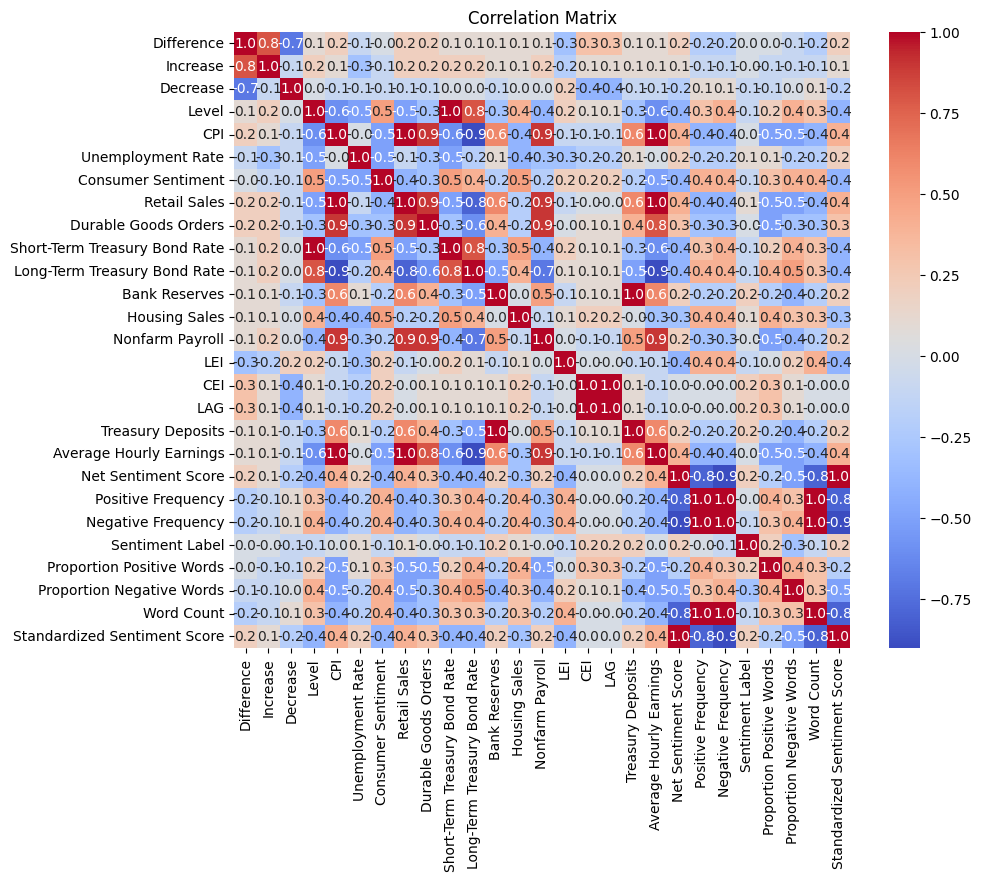

In [18]:
summary_stats = clean_data_numeric.describe(include='all')
summary_stats = summary_stats.round(1)  # Round to one decimal place
print(summary_stats)

correlation_matrix = clean_data_numeric.corr().round(1)  # Round to one decimal place
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", square=True)  # Format to one decimal place
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Get the absolute correlation values and sort them in descending order
correlation_values = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Filter out the diagonal elements (self-correlations) and duplicate pairs
correlation_values = correlation_values[correlation_values.index.get_level_values(0) < correlation_values.index.get_level_values(1)]

# Get the top 20 highest correlation coefficients
top_20_correlations = correlation_values[correlation_values >= 0.8].head(50)

# Display the filtered correlations
print(top_20_correlations)

Net Sentiment Score           Standardized Sentiment Score     1.000000
CEI                           LAG                              0.999984
Level                         Short-Term Treasury Bond Rate    0.996659
Average Hourly Earnings       CPI                              0.996224
Bank Reserves                 Treasury Deposits                0.995307
Negative Frequency            Word Count                       0.984813
Average Hourly Earnings       Retail Sales                     0.984144
Positive Frequency            Word Count                       0.983532
CPI                           Retail Sales                     0.980634
Negative Frequency            Positive Frequency               0.980585
Nonfarm Payroll               Retail Sales                     0.921120
CPI                           Nonfarm Payroll                  0.911869
Average Hourly Earnings       Nonfarm Payroll                  0.905748
Negative Frequency            Standardized Sentiment Score     0

C:\Users\abact\AppData\Local\Temp\ipykernel_19876\380872997.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


In [20]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Get the absolute correlation values and sort them in ascending order
correlation_values = correlation_matrix.abs().unstack().sort_values(ascending=True)

# Filter out the diagonal elements (self-correlations) and duplicate pairs
correlation_values = correlation_values[correlation_values.index.get_level_values(0) < correlation_values.index.get_level_values(1)]

# Get the 20 lowest correlation coefficients
lowest_correlations = correlation_values[correlation_values <= 0.1].head(30)

# Display the filtered correlations
print(lowest_correlations)

LAG                      Retail Sales                     0.001869
CEI                      Retail Sales                     0.002192
Housing Sales            Treasury Deposits                0.003539
Durable Goods Orders     Sentiment Label                  0.004312
CEI                      LEI                              0.005435
Bank Reserves            Housing Sales                    0.006176
CEI                      Positive Frequency               0.007323
Decrease                 Nonfarm Payroll                  0.008968
LAG                      Positive Frequency               0.009006
Average Hourly Earnings  Unemployment Rate                0.009282
CPI                      Unemployment Rate                0.009902
LAG                      LEI                              0.010639
Consumer Sentiment       Difference                       0.011861
Decrease                 Long-Term Treasury Bond Rate     0.013373
CEI                      Negative Frequency               0.01

C:\Users\abact\AppData\Local\Temp\ipykernel_19876\2524194299.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


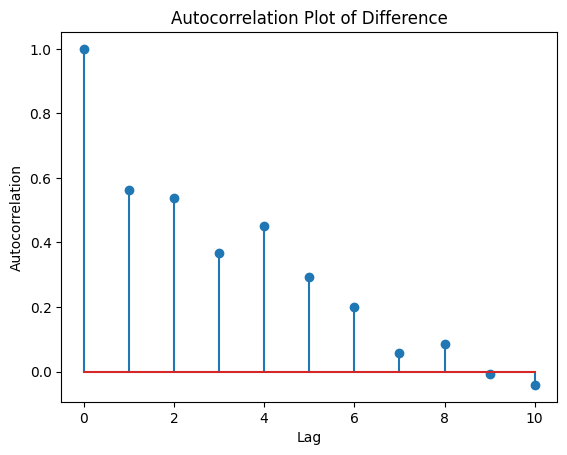

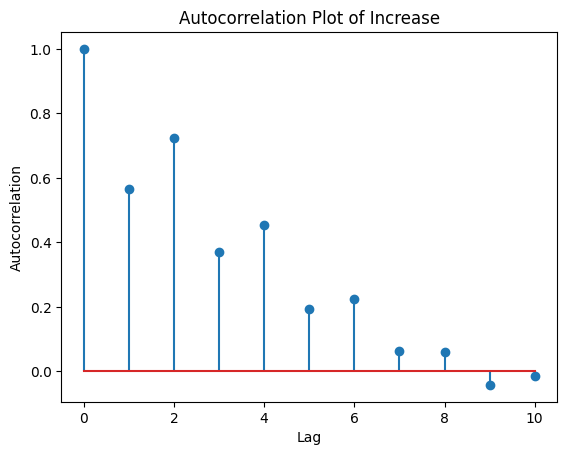

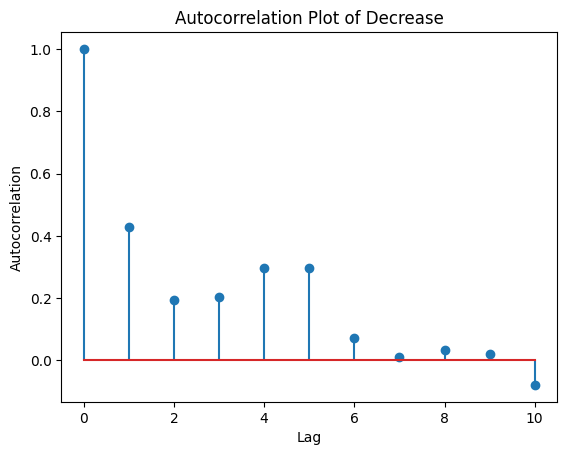

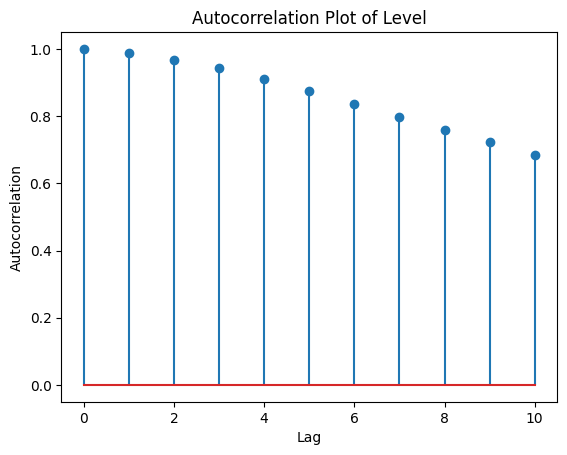

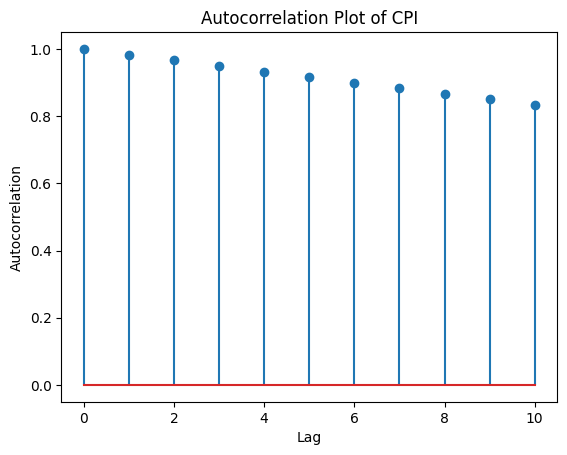

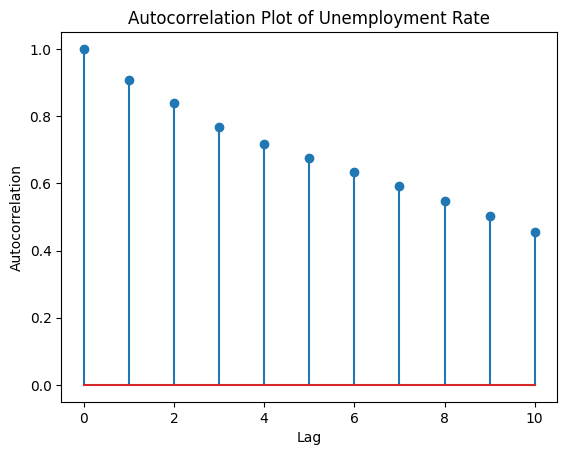

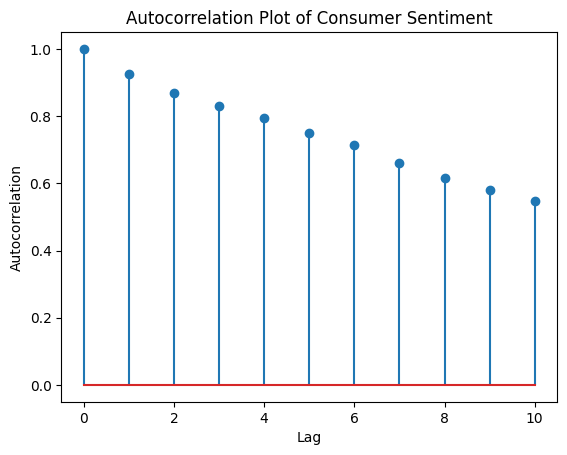

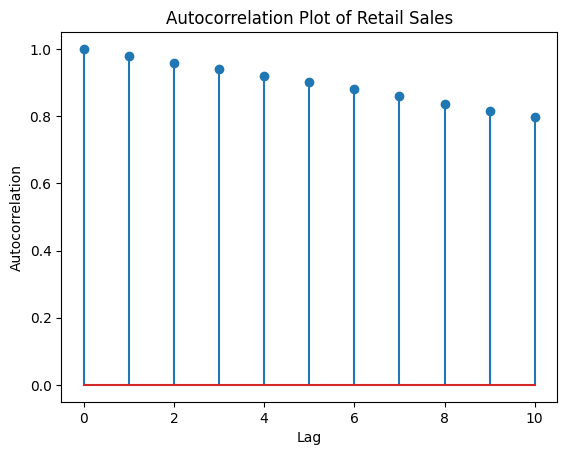

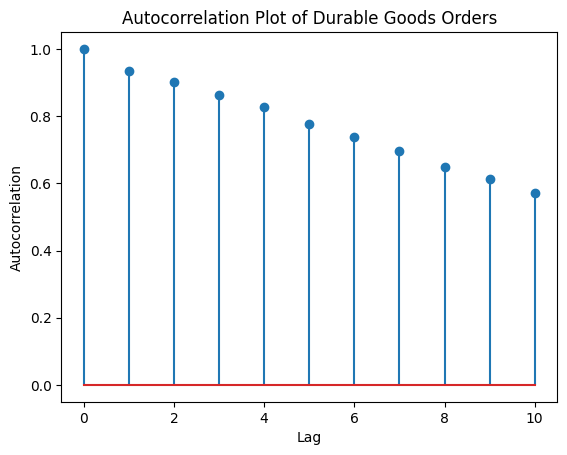

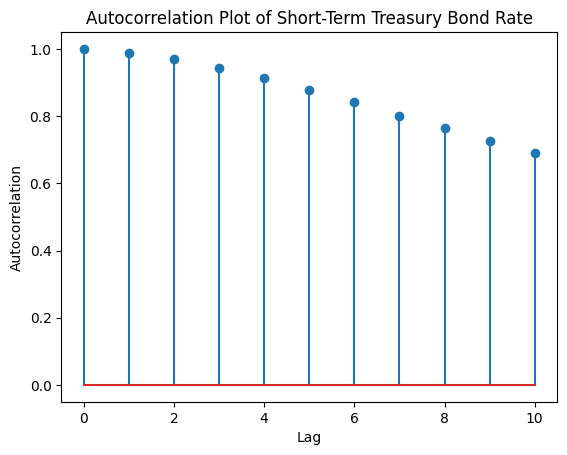

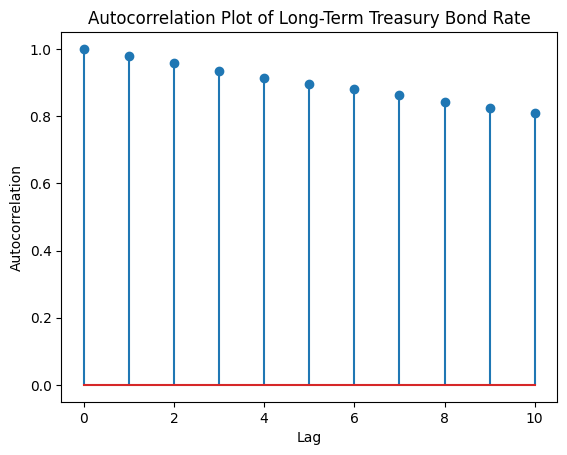

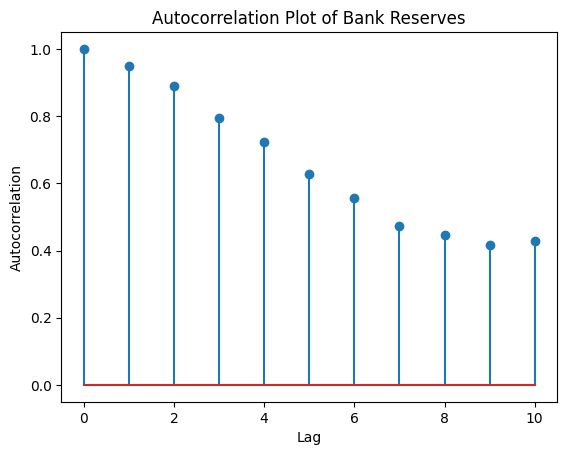

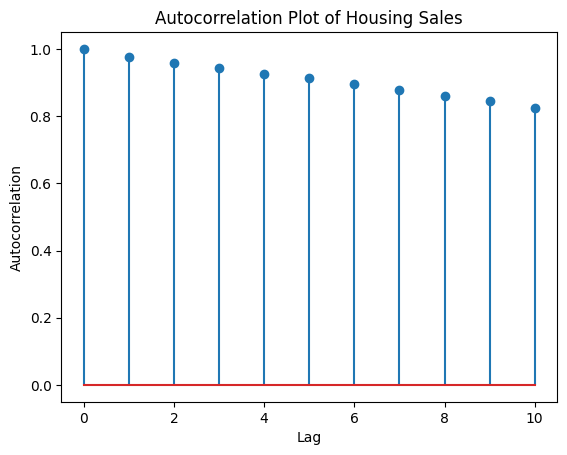

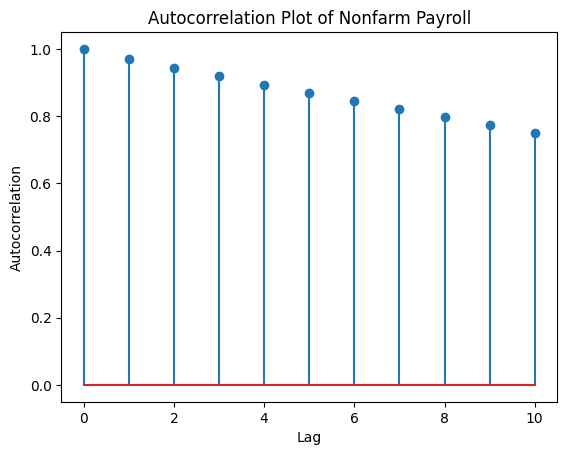

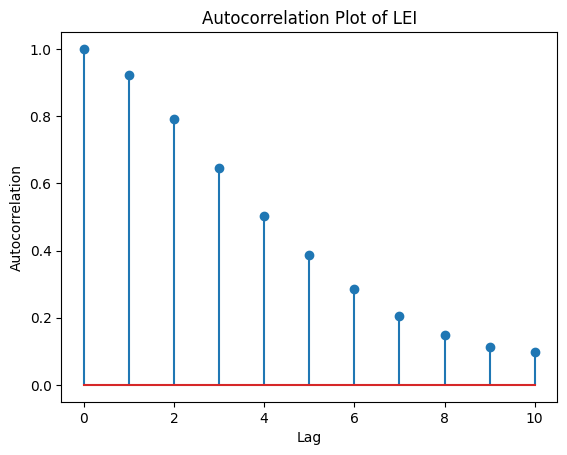

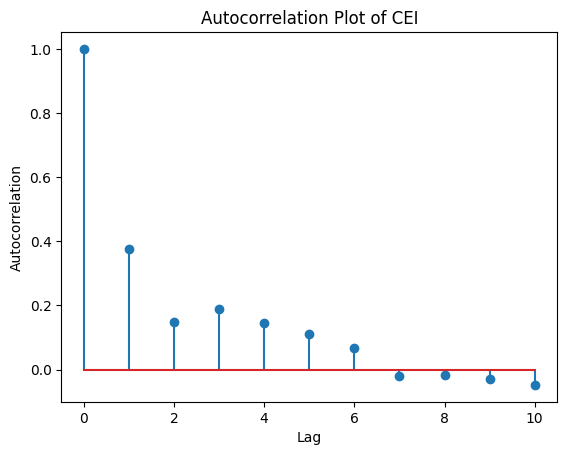

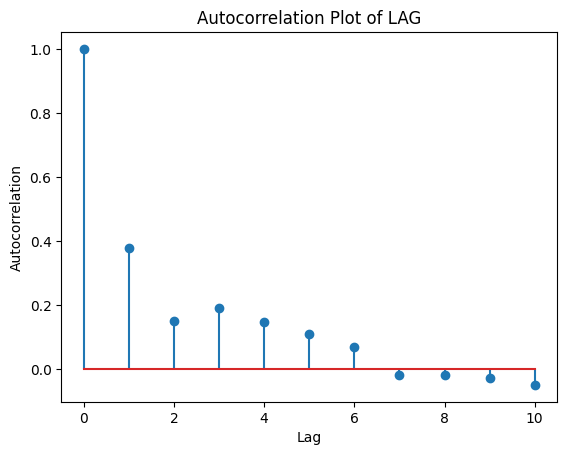

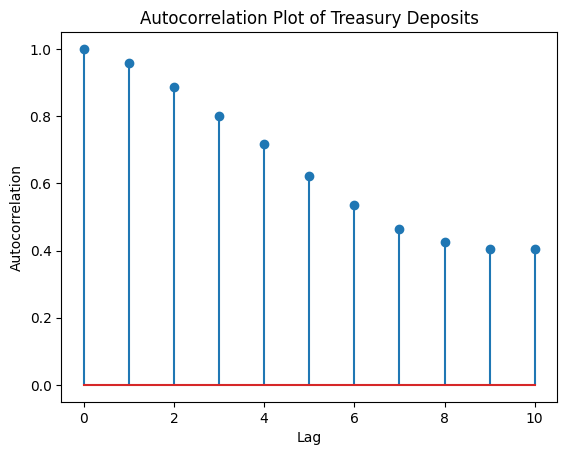

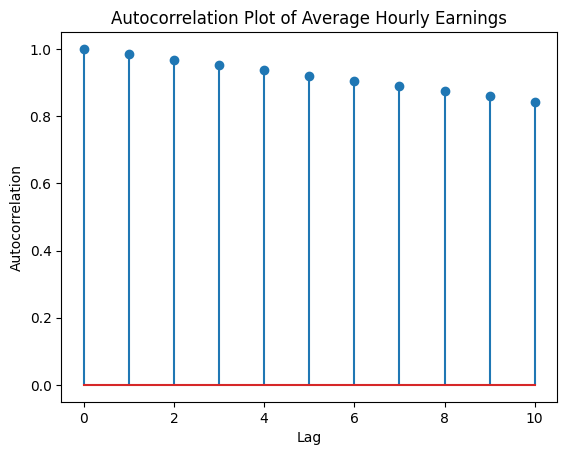

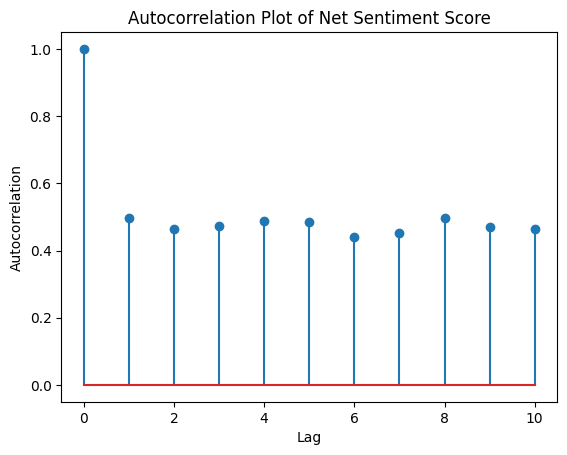

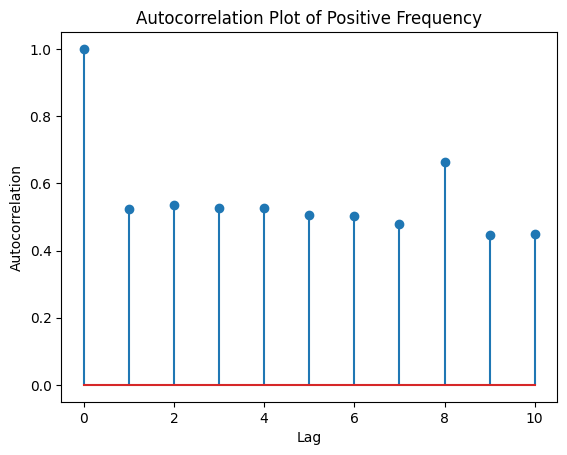

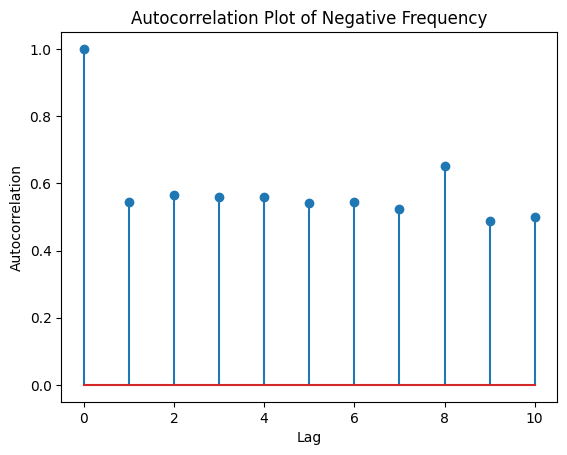

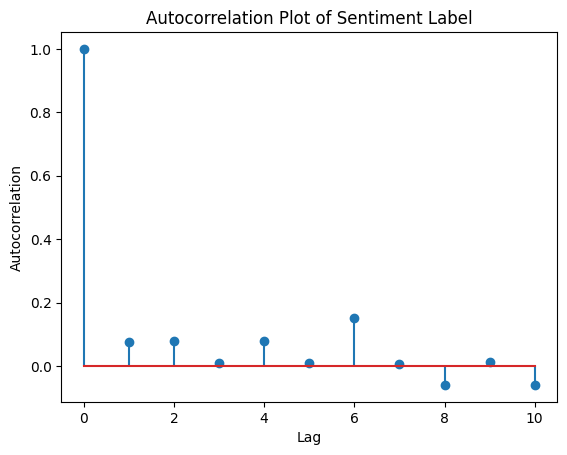

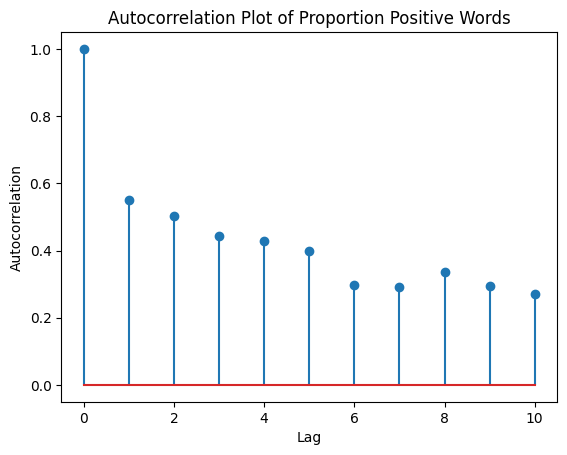

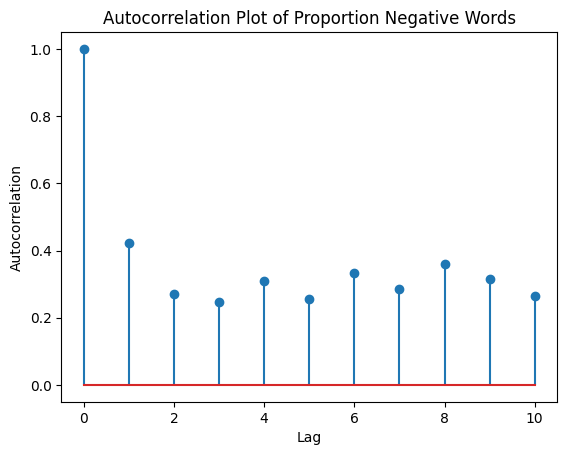

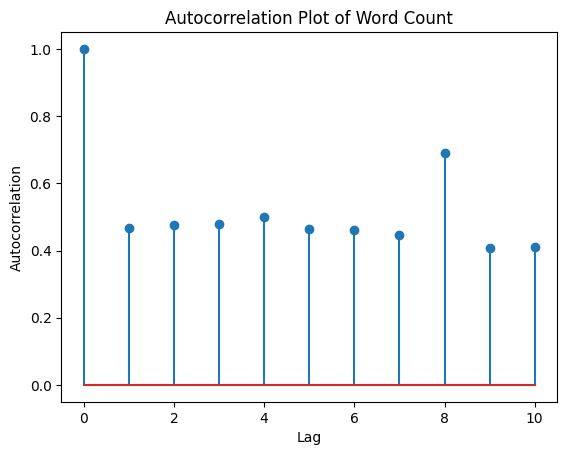

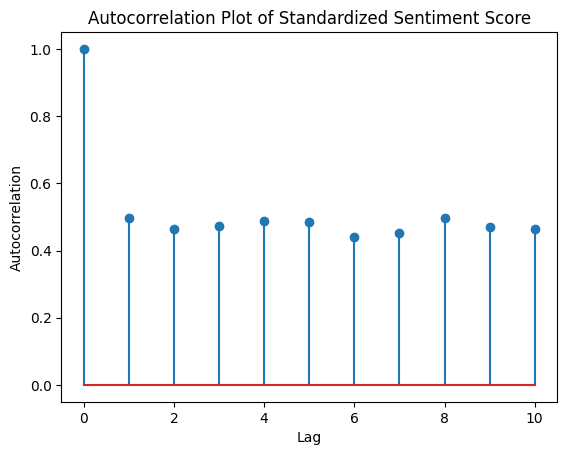

In [23]:
# Iterate over each column (excluding 'Date' and 'Sentiment Label', 'Positive Words', 'Negative Words')
for column in clean_data_numeric.columns:
    if column not in ['Date', 'Positive Words', 'Negative Words']:
        # Compute the autocorrelation
        acf = sm.tsa.acf(clean_data_numeric[column], nlags=10)
        
        # Plot the autocorrelation
        plt.stem(range(len(acf)), acf)
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.title(f'Autocorrelation Plot of {column}')
        plt.show()

### Z-scores are an important metric when calculating skewness. Any data that has an inherent trend will need to have that trend considered before being used for causal inference, as that skewness may have an endogenous explanation of its own.

In [25]:
# Select only numeric columns
numeric_columns = clean_data_numeric.select_dtypes(include=np.number).columns

# Calculate z-scores for each numeric column in the dataset
z_scores = stats.zscore(clean_data_numeric[numeric_columns])

# Create a new DataFrame with z-scores
z_scores_df = pd.DataFrame(z_scores, columns=numeric_columns)

z_scores

z_scores_df


Difference  Increase  Decrease     Level       CPI  Unemployment Rate  \
0     -0.092222 -0.441564 -0.322144  0.571323 -1.614146           0.884651   
1     -0.092222 -0.441564 -0.322144  0.571323 -1.601880           0.717179   
2     -0.092222 -0.441564 -0.322144  0.571323 -1.579799           0.773003   
3     -2.323988 -0.441564  3.142697  0.338758 -1.572439           0.661355   
4     -0.092222 -0.441564 -0.322144  0.338758 -1.565079           0.605530   
5     -0.092222 -0.441564 -0.322144  0.338758 -1.560172           0.549706   
6     -0.092222 -0.441564 -0.322144  0.338758 -1.535639           0.493882   
7     -0.092222 -0.441564 -0.322144  0.338758 -1.528279           0.438058   
8      1.023661  1.202413 -0.322144  0.338758 -1.528279           0.493882   
9      1.023661  1.202413 -0.322144  0.455040 -1.508652           0.438058   
10     2.139544  2.846391 -0.322144  0.803889 -1.498838           0.214761   
11    -0.092222 -0.441564 -0.322144  0.803889 -1.476758           0.214761   
12     2.139544  2.846391 -0.322144  1.036454 -1.462038           0.158937   
13    -0.092222 -0.441564 -0.322144  1.036454 -1.454678           0.103113   
14     3.255427  4.490369 -0.322144  1.385303 -1.442411          -0.064359   
15    -0.092222 -0.441564 -0.322144  1.385303 -1.435051          -0.120183   
16     2.139544  2.846391 -0.322144  1.617868 -1.425237          -0.064359   
17    -0.092222 -0.441564 -0.322144  1.617868 -1.408064          -0.176008   
18    -0.092222 -0.441564 -0.322144  1.617868 -1.385984          -0.064359   
19    -1.208105 -0.441564  1.410276  1.501585 -1.373717          -0.008535   
20    -0.092222 -0.441564 -0.322144  1.501585 -1.366357          -0.008535   
21    -0.092222 -0.441564 -0.322144  1.501585 -1.361450          -0.064359   
22    -0.092222 -0.441564 -0.322144  1.501585 -1.346730          -0.064359   
23    -1.208105 -0.441564  1.410276  1.385303 -1.341823          -0.064359   
24    -1.208105 -0.441564  1.410276  1.269020 -1.322196          -0.064359   
25    -0.092222 -0.441564 -0.322144  1.269020 -1.302569          -0.120183   
26    -0.092222 -0.441564 -0.322144  1.269020 -1.280489          -0.064359   
27    -0.092222 -0.441564 -0.322144  1.269020 -1.273129          -0.231832   
28    -0.092222 -0.441564 -0.322144  1.269020 -1.260862          -0.343480   
29    -0.092222 -0.441564 -0.322144  1.269020 -1.248595          -0.287656   
30    -0.092222 -0.441564 -0.322144  1.269020 -1.224062          -0.176008   
31    -0.092222 -0.441564 -0.322144  1.269020 -1.214248          -0.176008   
32    -0.092222 -0.441564 -0.322144  1.269020 -1.206888          -0.231832   
33     1.023661  1.202413 -0.322144  1.385303 -1.197075          -0.287656   
34    -0.092222 -0.441564 -0.322144  1.385303 -1.194621          -0.455128   
35    -0.092222 -0.441564 -0.322144  1.385303 -1.187261          -0.399304   
36    -0.092222 -0.441564 -0.322144  1.385303 -1.172541          -0.510952   
37    -0.092222 -0.441564 -0.322144  1.385303 -1.162728          -0.455128   
38    -0.092222 -0.441564 -0.322144  1.385303 -1.150461          -0.622601   
39    -0.092222 -0.441564 -0.322144  1.385303 -1.148007          -0.566776   
40    -0.092222 -0.441564 -0.322144  1.385303 -1.143101          -0.622601   
41    -0.092222 -0.441564 -0.322144  1.385303 -1.143101          -0.566776   
42    -0.092222 -0.441564 -0.322144  1.385303 -1.128380          -0.734249   
43    -0.092222 -0.441564 -0.322144  1.385303 -1.123474          -0.678425   
44    -0.092222 -0.441564 -0.322144  1.385303 -1.108754          -0.678425   
45    -1.208105 -0.441564  1.410276  1.269020 -1.106300          -0.622601   
46    -1.208105 -0.441564  1.410276  1.036454 -1.091580          -0.734249   
47    -0.092222 -0.441564 -0.322144  1.036454 -1.084220          -0.734249   
48    -0.092222 -0.441564 -0.322144  1.036454 -1.076860          -0.790073   
49    -0.092222 -0.441564 -0.322144  1.036454 -1.074406          -0.845897   
50    -0.092222 -0.441564 -

In [26]:
def calculate_z_scores(data):
    n = len(data)
    if data.dtype.kind in ['i', 'f']:  # Check if data is numeric
        observed_skewness = skew(data)
        observed_kurtosis = kurtosis(data)

        expected_skewness = 0
        expected_kurtosis = 0

        standard_error_skewness = np.sqrt(6 / n)
        standard_error_kurtosis = np.sqrt(24 / n)

        z_score_skewness = (observed_skewness - expected_skewness) / standard_error_skewness
        z_score_kurtosis = (observed_kurtosis - expected_kurtosis) / standard_error_kurtosis

        return z_score_skewness, z_score_kurtosis
    else:
        return None, None


# Calculate z-scores for skewness and kurtosis for each column in the dataset
z_scores = {}
for column in dataset.columns:
    z_score_skewness, z_score_kurtosis = calculate_z_scores(dataset[column])
    if z_score_skewness is not None and z_score_kurtosis is not None:
        z_scores[column] = (z_score_skewness, z_score_kurtosis)

# Print the z-scores for each column
for column, (z_score_skewness, z_score_kurtosis) in z_scores.items():
    print("Column:", column)
    print("Z-score for skewness:", z_score_skewness)
    print("Z-score for kurtosis:", z_score_kurtosis)
    print()

Column: Difference
Z-score for skewness: -1.4703235632311655
Z-score for kurtosis: 13.613372726931349

Column: Increase
Z-score for skewness: 16.809241430084505
Z-score for kurtosis: 23.45400039040019

Column: Decrease
Z-score for skewness: 22.714072801523393
Z-score for kurtosis: 43.9176768614456

Column: Level
Z-score for skewness: 2.3613964093530755
Z-score for kurtosis: -4.601257939085456

Column: CPI
Z-score for skewness: 1.295978124493932
Z-score for kurtosis: -2.7389170152106024

Column: Unemployment Rate
Z-score for skewness: 8.616755503947003
Z-score for kurtosis: 7.196710665378044

Column: Consumer Sentiment
Z-score for skewness: -3.292186760663024
Z-score for kurtosis: -1.1672466393093939

Column: Retail Sales
Z-score for skewness: 3.8586347624010573
Z-score for kurtosis: -0.3306801360717421

Column: Durable Goods Orders
Z-score for skewness: 0.30889258380447493
Z-score for kurtosis: -1.7083301352952558

Column: Short-Term Treasury Bond Rate
Z-score for skewness: 2.273848482

In [27]:
clean_data_numeric

Date  Difference  Increase  Decrease  Level      CPI  \
0    1993-02-03        0.00      0.00      0.00   3.75  142.800   
1    1993-03-23        0.00      0.00      0.00   3.75  143.300   
2    1993-05-18        0.00      0.00      0.00   3.75  144.200   
3    1993-07-07       -0.50      0.00      0.50   3.25  144.500   
4    1993-08-17        0.00      0.00      0.00   3.25  144.800   
5    1993-09-21        0.00      0.00      0.00   3.25  145.000   
6    1993-11-16        0.00      0.00      0.00   3.25  146.000   
7    1993-12-21        0.00      0.00      0.00   3.25  146.300   
8    1994-02-04        0.25      0.25      0.00   3.25  146.300   
9    1994-03-22        0.25      0.25      0.00   3.50  147.100   
10   1994-05-17        0.50      0.50      0.00   4.25  147.500   
11   1994-07-06        0.00      0.00      0.00   4.25  148.400   
12   1994-08-16        0.50      0.50      0.00   4.75  149.000   
13   1994-09-27        0.00      0.00      0.00   4.75  149.300   
14   1994-11-15        0.75      0.75      0.00   5.50  149.800   
15   1994-12-20        0.00      0.00      0.00   5.50  150.100   
16   1995-02-01        0.50      0.50      0.00   6.00  150.500   
17   1995-03-28        0.00      0.00      0.00   6.00  151.200   
18   1995-05-23        0.00      0.00      0.00   6.00  152.100   
19   1995-07-06       -0.25      0.00      0.25   5.75  152.600   
20   1995-08-22        0.00      0.00      0.00   5.75  152.900   
21   1995-09-26        0.00      0.00      0.00   5.75  153.100   
22   1995-11-15        0.00      0.00      0.00   5.75  153.700   
23   1995-12-19       -0.25      0.00      0.25   5.50  153.900   
24   1996-01-30       -0.25      0.00      0.25   5.25  154.700   
25   1996-03-26        0.00      0.00      0.00   5.25  155.500   
26   1996-05-21        0.00      0.00      0.00   5.25  156.400   
27   1996-07-02        0.00      0.00      0.00   5.25  156.700   
28   1996-08-20        0.00      0.00      0.00   5.25  157.200   
29   1996-09-24        0.00      0.00      0.00   5.25  157.700   
30   1996-11-13        0.00      0.00      0.00   5.25  158.700   
31   1996-12-17        0.00      0.00      0.00   5.25  159.100   
32   1997-02-04        0.00      0.00      0.00   5.25  159.400   
33   1997-03-25        0.25      0.25      0.00   5.50  159.800   
34   1997-05-20        0.00      0.00      0.00   5.50  159.900   
35   1997-07-01        0.00      0.00      0.00   5.50  160.200   
36   1997-08-19        0.00      0.00      0.00   5.50  160.800   
37   1997-09-30        0.00      0.00      0.00   5.50  161.200   
38   1997-11-12        0.00      0.00      0.00   5.50  161.700   
39   1997-12-16        0.00      0.00      0.00   5.50  161.800   
40   1998-02-03        0.00      0.00      0.00   5.50  162.000   
41   1998-03-31        0.00      0.00      0.00   5.50  162.000   
42   1998-05-19        0.00      0.00      0.00   5.50  162.600   
43   1998-06-30        0.00      0.00      0.00   5.50  162.800   
44   1998-08-18        0.00      0.00      0.00   5.50  163.400   
45   1998-09-29       -0.25      0.00      0.25   5.25  163.500   
46   1998-11-17       -0.25      0.00      0.25   4.75  164.100   
47   1998-12-22        0.00      0.00      0.00   4.75  164.400   
48   1999-02-02        0.00      0.00      0.00   4.75  164.700   
49   1999-03-30        0.00      0.00      0.00   4.75  164.800   
50   1999-05-18        0.00      0.00      0.00   4.75  166.000   
51   1999-06-29        0.25      0.25      0.00   5.00  166.000   
52   1999-08-24        0.25      0.25      0.00   5.25  167.100   
53   1999-10-05        0.00      0.00      0.00   5.25  167.800   
54   1999-11-16        0.25      0.25      0.00   5.50  168.400   
55   1999-12-21        0.00      0.00      0.00   5.50  168.800   
56   2000-02-02        0.25      0.25      0.00   5.75  169.300   
57   2000-03-21        0.25      0.25      0.00   6.00  171.000   
58   2000-05-16        0.50      0.50      0.00   6.50  17

### Time plots are a good way to view trends and skewness, as well as eyeballing which variables seem to have relevance to the outcome variable and which need cleaning.

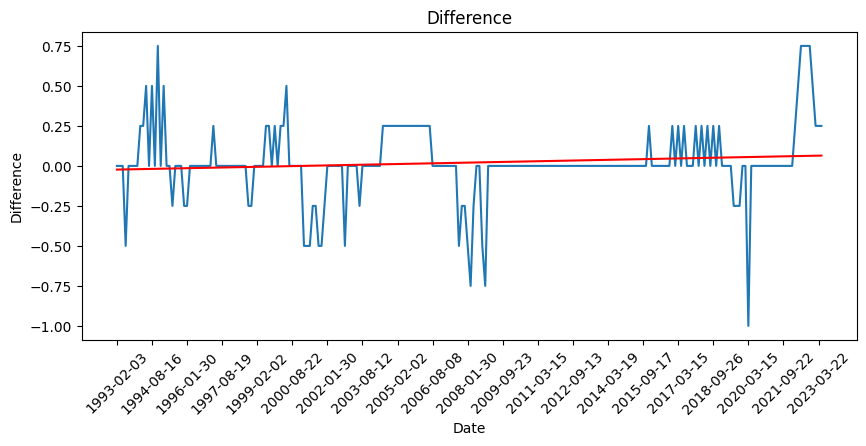

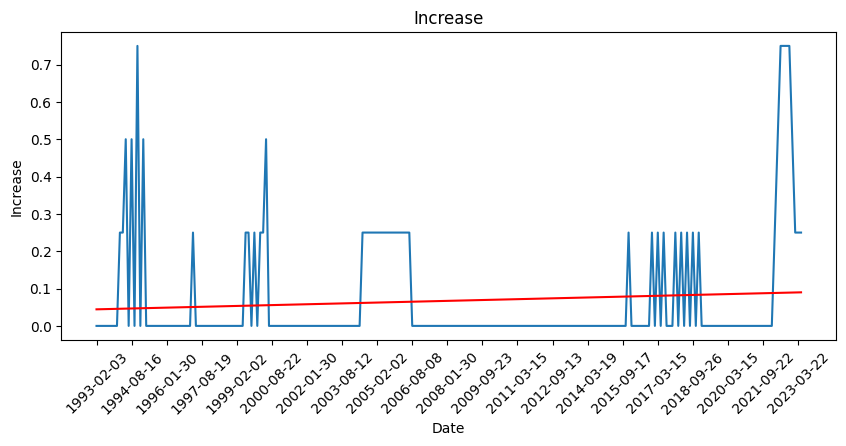

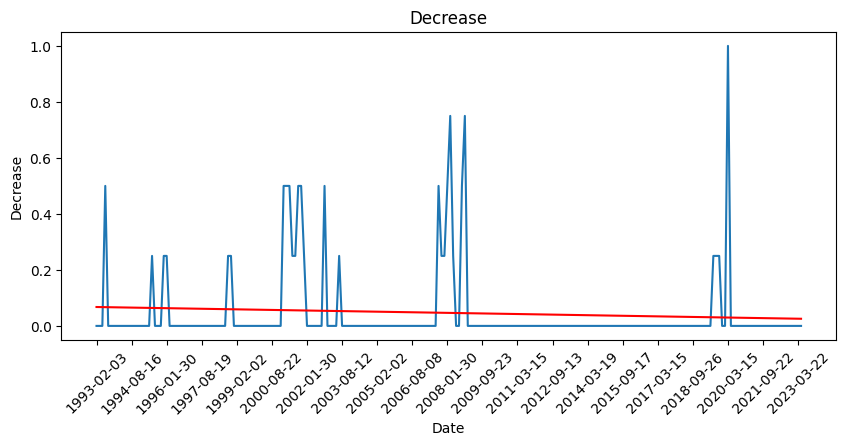

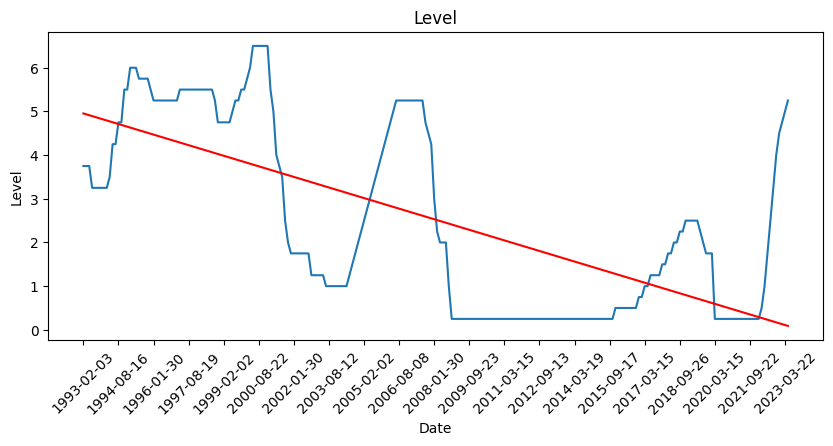

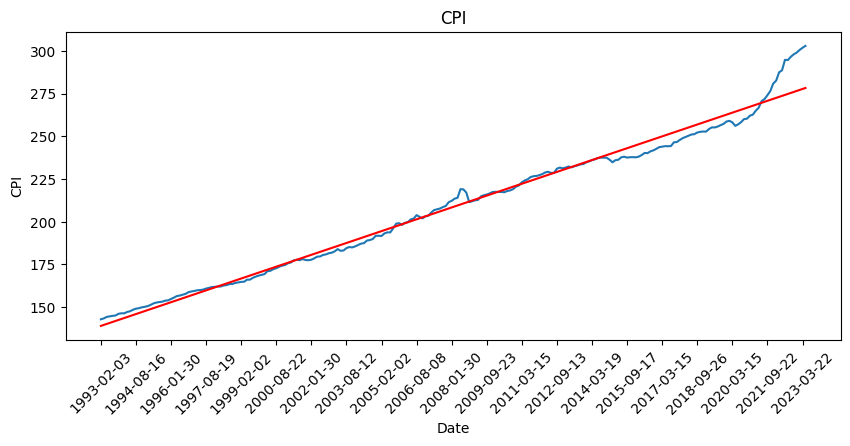

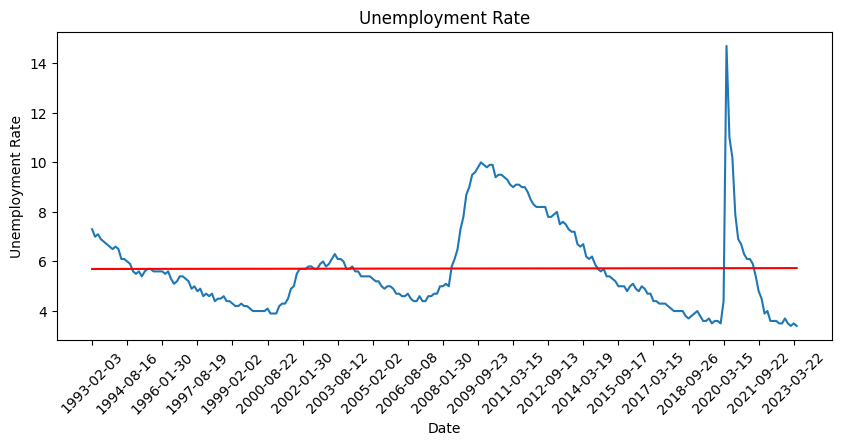

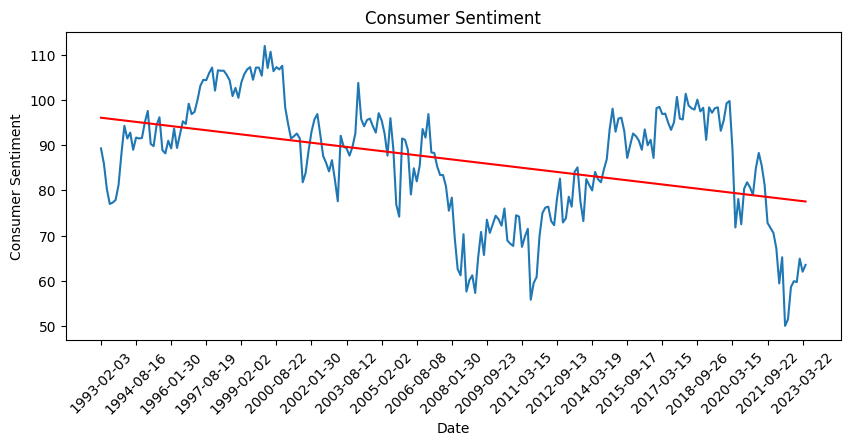

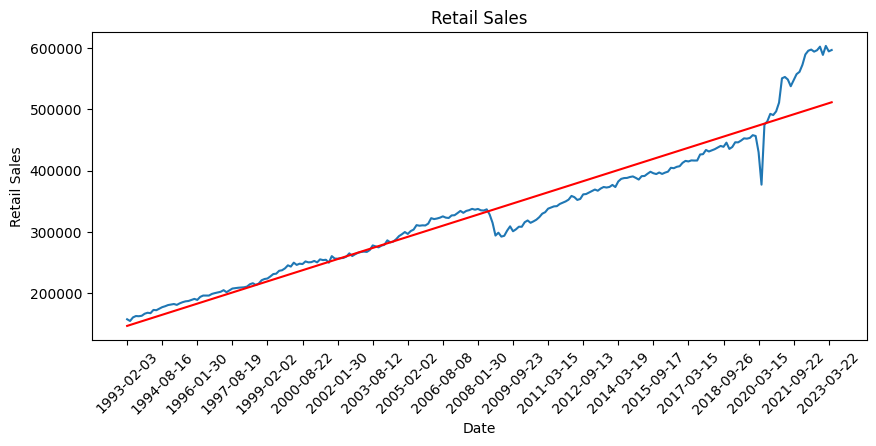

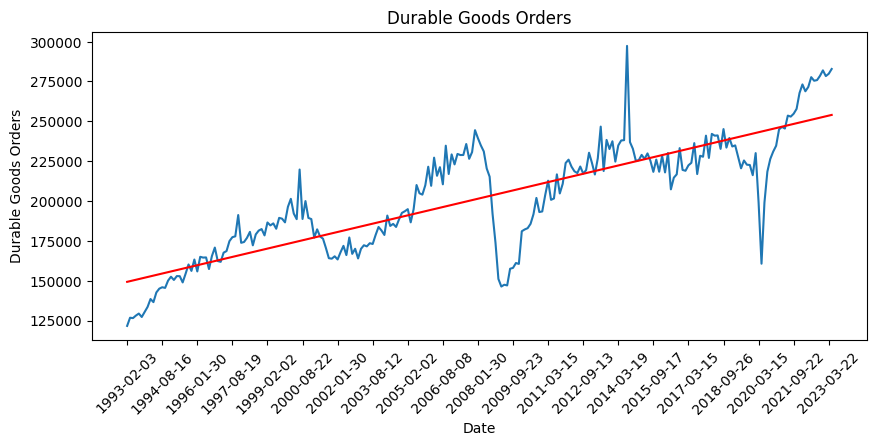

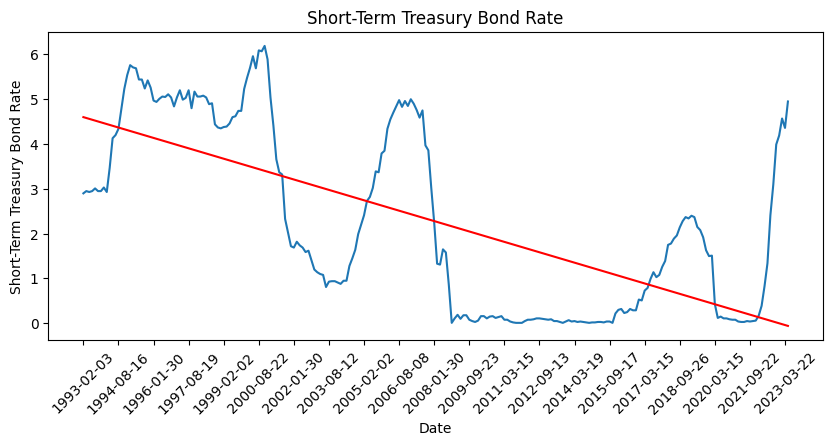

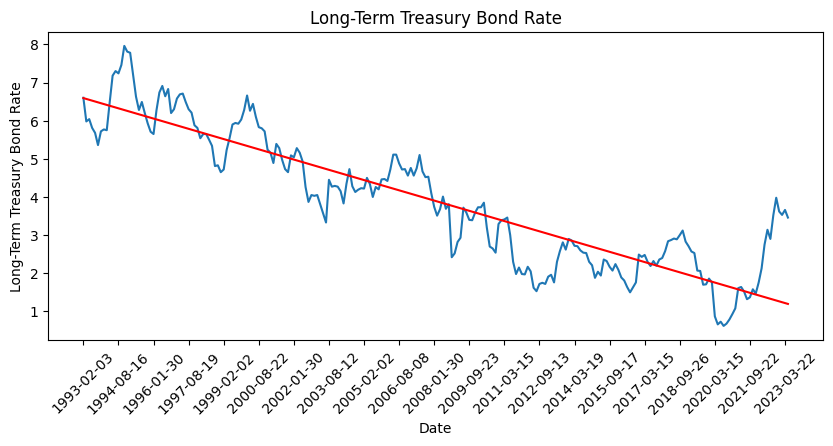

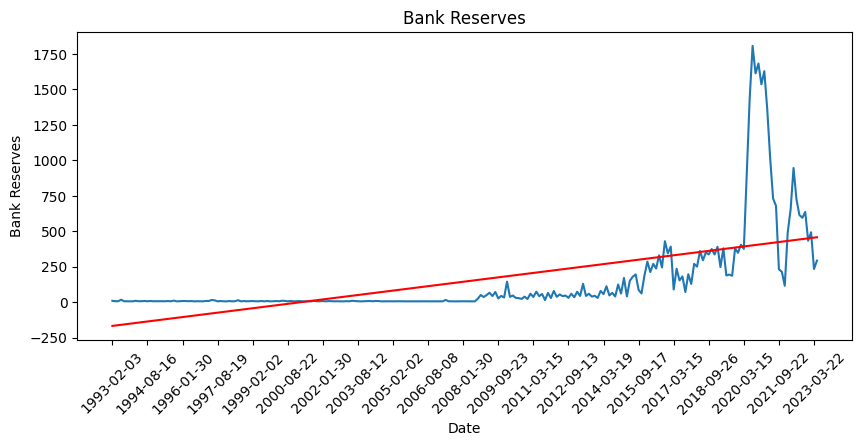

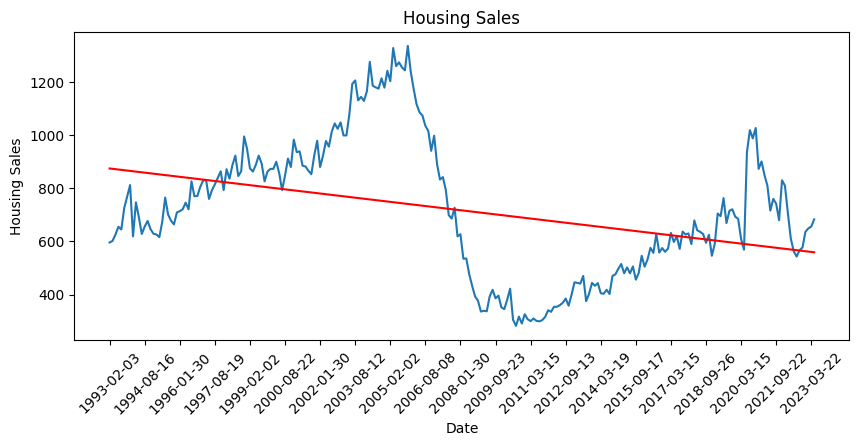

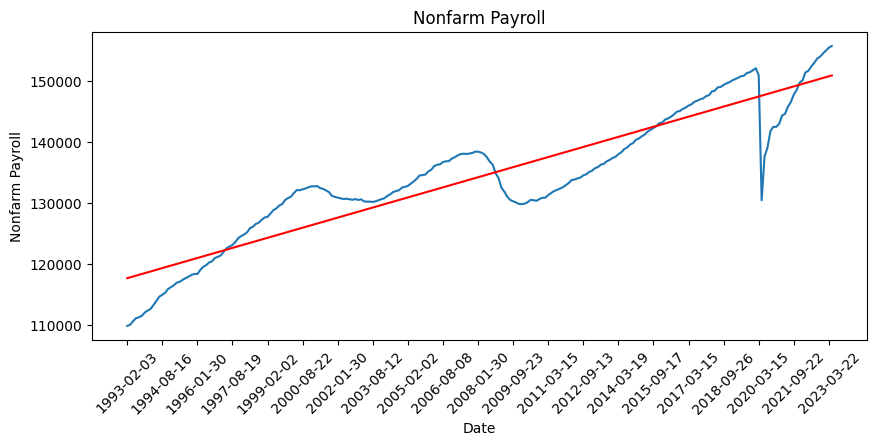

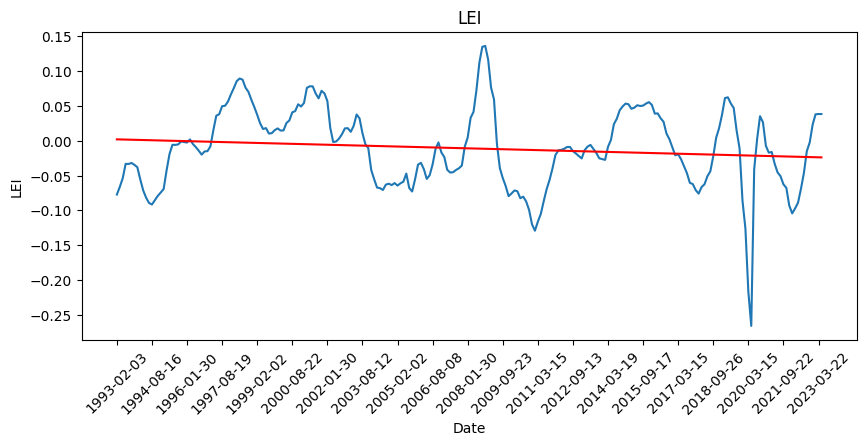

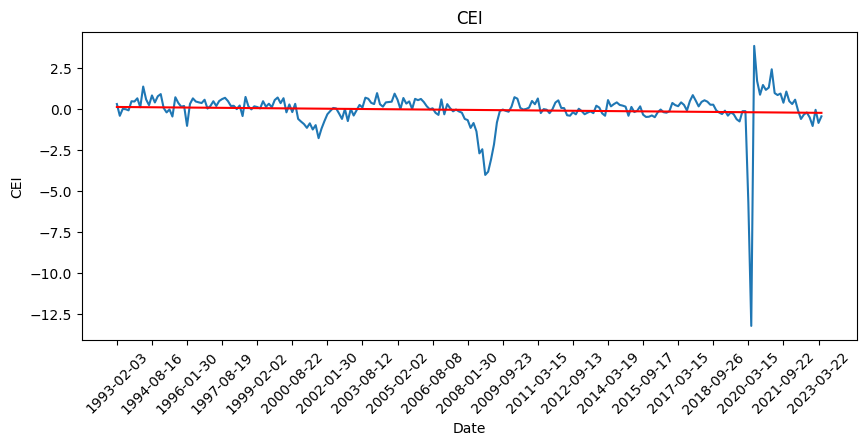

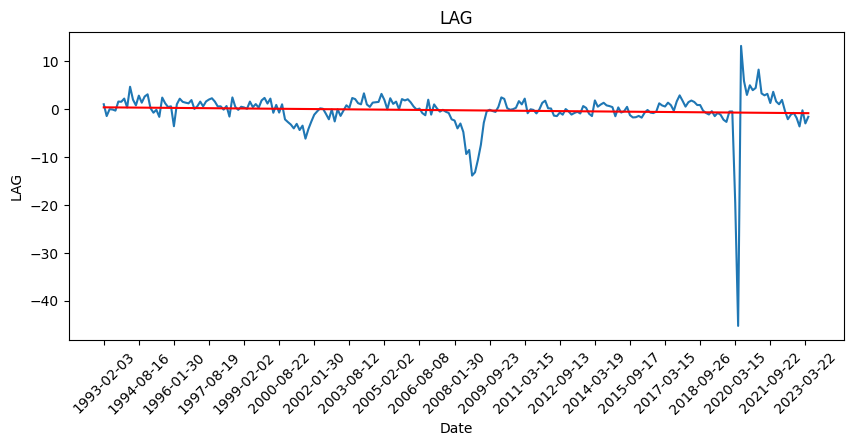

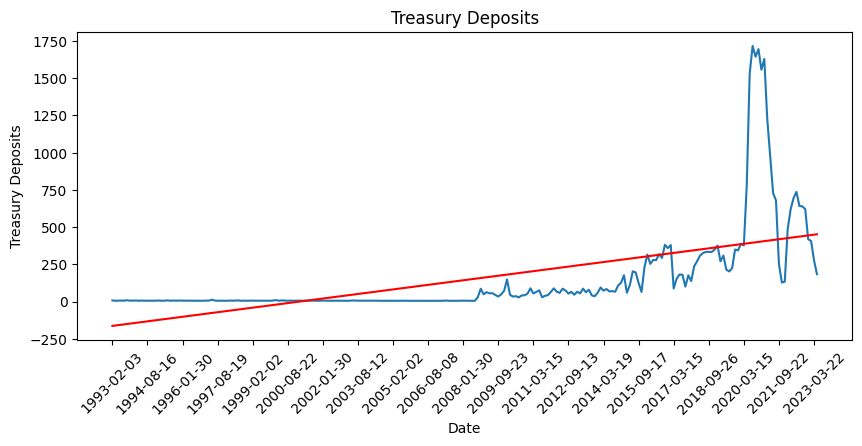

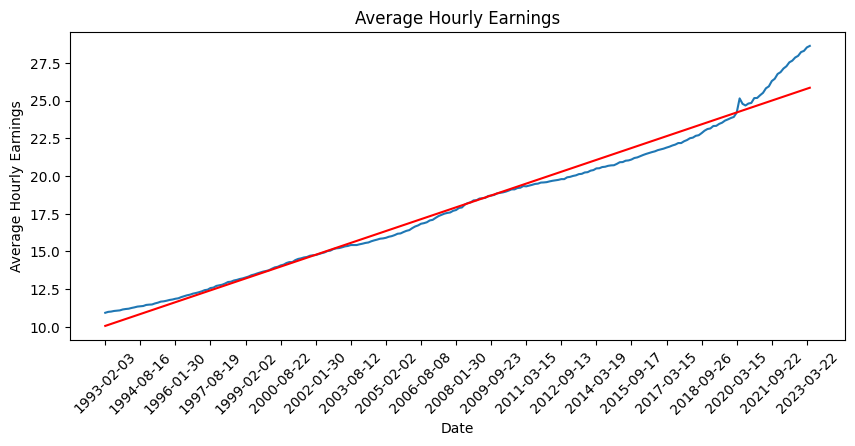

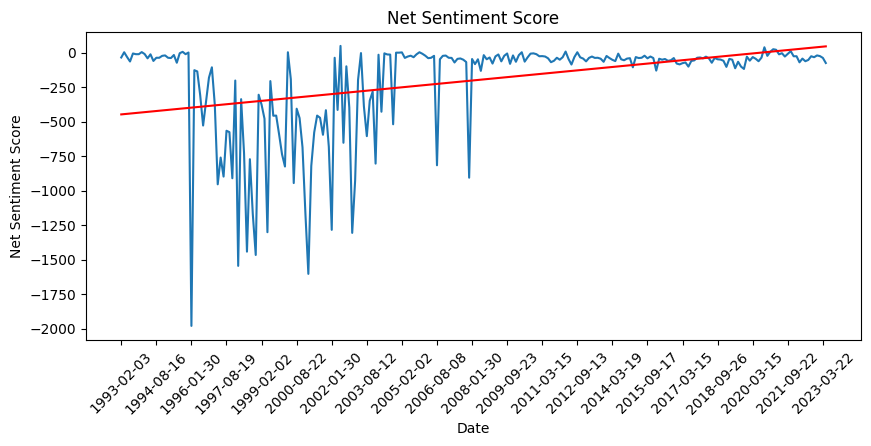

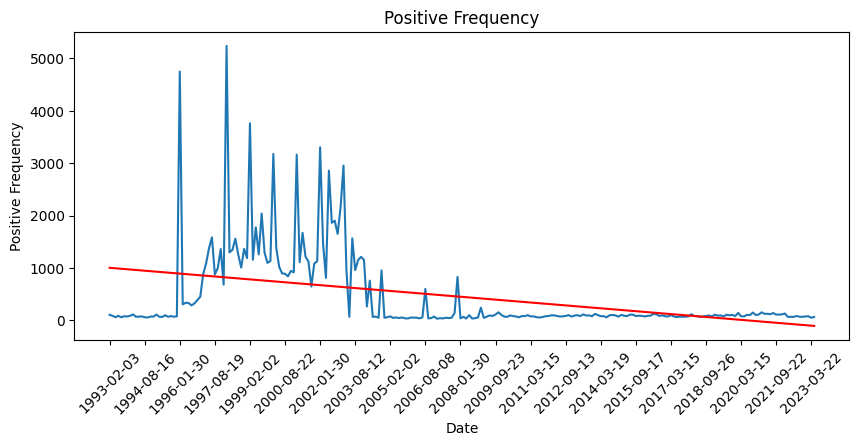

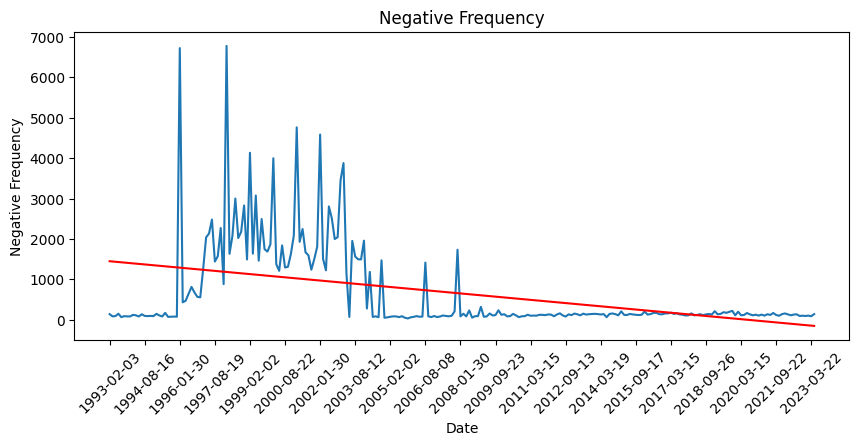

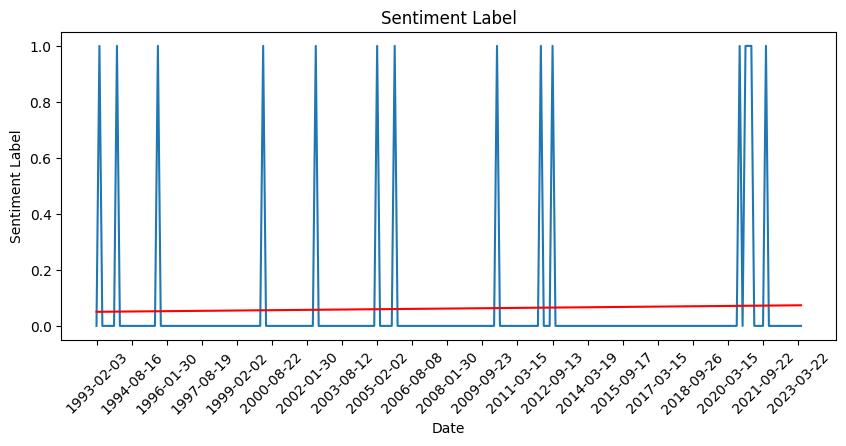

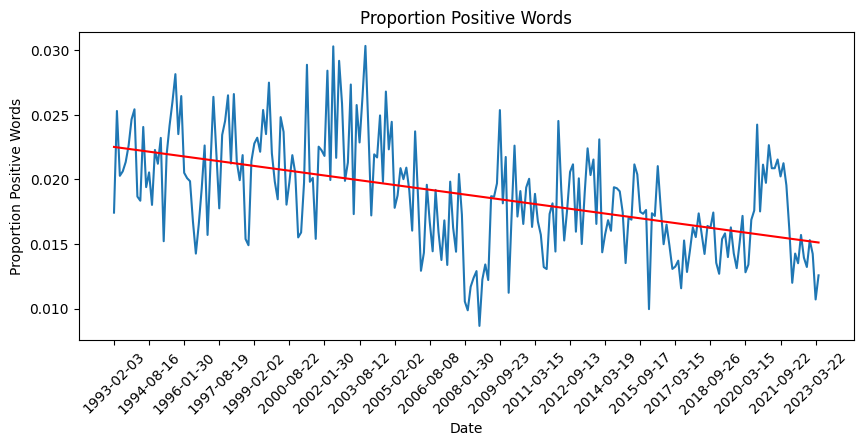

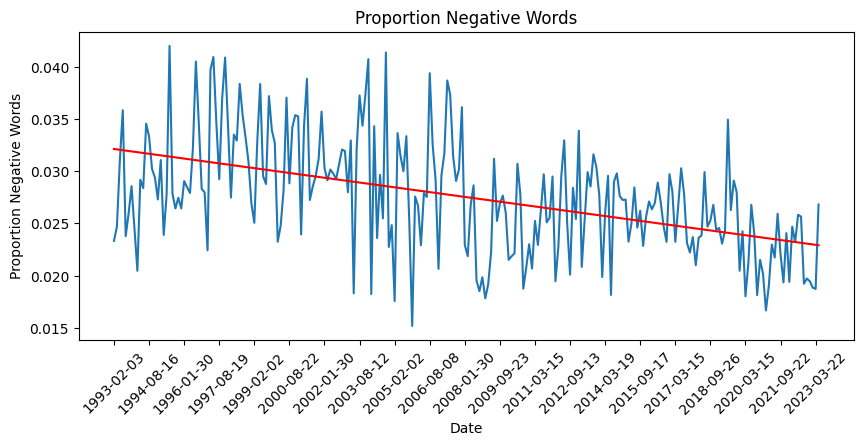

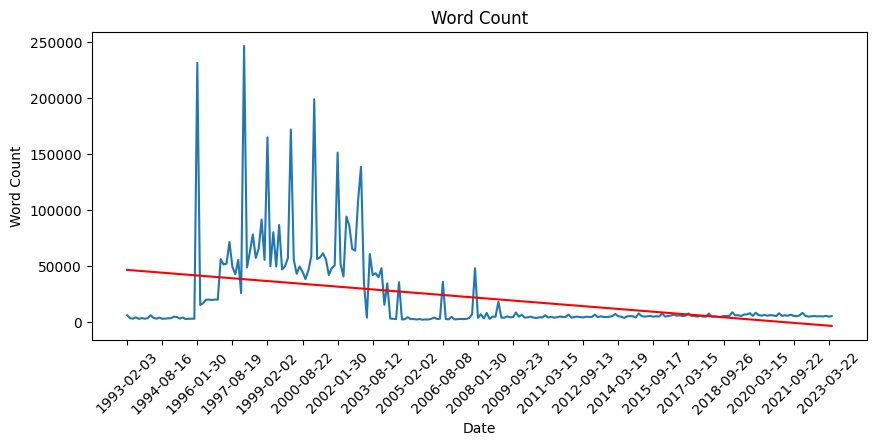

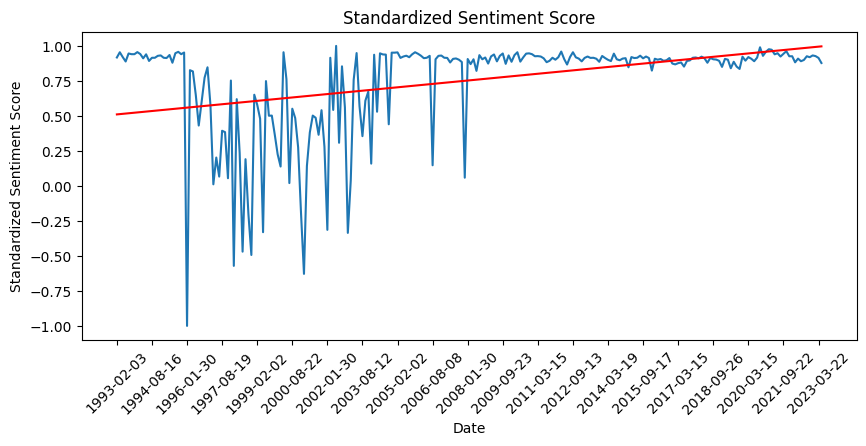

In [28]:
for column in clean_data_numeric.columns:
    if column != 'Date' and column != 'Positive Words' and column != 'Negative Words':
        plt.figure(figsize=(10, 4))
        plt.plot(clean_data_numeric['Date'], clean_data_numeric[column])
        plt.title(column)
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.xticks(clean_data_numeric['Date'][::12], rotation=45)

        # Convert column values to numeric
        y = pd.to_numeric(clean_data_numeric[column], errors='coerce')

        # Calculate the line of best fit
        x = np.arange(len(clean_data_numeric['Date']))
        slope, intercept, _, _, _ = linregress(x, y)
        line = slope * x + intercept

        plt.plot(x, line, color='red')
        plt.show()

###Save the data for Feature Engineering

In [32]:
dataset.to_csv(r'C:\Users\abact\BC-Project\data\dataset.csv', index=False)

###Partition the data so it's ready for training.

In [30]:
# Split into training, validation, and test sets
train_data, temp_data = train_test_split(dataset, test_size=0.2, shuffle=False)
val_data, test_data = train_test_split(temp_data, test_size=0.5, shuffle=False)

# Verify the sizes of each set
print("Training set size:", len(train_data))
print("Validation set size:", len(val_data))
print("Test set size:", len(test_data))

train_data.to_csv(r'C:\Users\abact\BC-Project\data\train_data.csv', index=False)
temp_data.to_csv(r'C:\Users\abact\BC-Project\data\temp_data.csv', index=False)
val_data.to_csv(r'C:\Users\abact\BC-Project\data\val_data.csv', index=False)

Training set size: 193
Validation set size: 24
Test set size: 25
